# Regular Deep Neural Network

## Standard CNN

In [ ]:
# import numpy as np
# import torch
# import random
# import torch.nn as nn
# from torchvision import models
# import torch.nn.functional as F

In [ ]:


# # Exemplary Model
# class CNN(nn.Module):
#     def __init__(self, numChannels, classes):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(in_channels=numChannels, out_channels=20,
#             kernel_size= (3, 3))
#         self.relu1 = nn.ReLU()
#         self.maxpool1 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
#         self.conv2 = nn.Conv2d(in_channels=20, out_channels=5,
#             kernel_size=(5, 5))
#         self.relu2 = nn.ReLU()
#         self.maxpool2 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
#         self.fc1 = nn.Linear(in_features=5 * 53 * 53, out_features=500)
#         self.relu3 = nn.ReLU()
#         self.fc2 = nn.Linear(in_features=500, out_features=classes)
#         self.logSoftmax = nn.Softmax(dim=10)
    
#     def forward(self, x):
#         x = self.conv1(x)
#         x = self.relu1(x)
#         x = self.maxpool1(x)
#         x = self.conv2(x)
#         x = self.relu2(x)
#         x = self.maxpool2(x)
#         x = torch.flatten(x, 1)
#         x = self.fc1(x)
#         x = self.relu3(x)
#         x = self.fc2(x)
#         output = self.logSoftmax(x)
#         return output#F.log_softmax(x, dim=1)

## Pre-trained net

In [ ]:

# # todo
# class MobileNetV2Post:

#     def __init__(self, num_classes, use_pretrained=True):
        
#         model_ft, input_size = MobileNetV2Post(12, use_pretrained=True)

#         device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#         model_ft = model_ft.to(device)
#         params_to_update = model_ft.parameters()
#         # Observe that all parameters are being optimized
#         optimizer_ft = optim.SGD(params_to_update, lr=0.001, momentum=0.9)
#         criterion = nn.CrossEntropyLoss()

#         model, val_acc = self.train_model(model=model_ft, criterion=criterion, optimizer=optimizer_ft, num_epochs=5, is_inception=False)

#     def initialise_model(self, num_classes, use_pretrained=True):
#         model_ft = None
#         input_size = 0
#         model_ft = models.mobilenet_v2(pretrained=use_pretrained)
#         num_ftrs = 1280
#         model_ft.fc = nn.Linear(num_ftrs, num_classes)
#         input_size = 224

#         return model_ft, input_size



# Data augmentation

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from google.colab import files
import numpy as np
import math
import tensorflow_hub as hub

tf.random.set_seed(123)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



In [ ]:
from keras.datasets import cifar10

batch_size = 64
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train / 255
x_test = x_test / 255
y_train = tf.one_hot(y_train[:,0], 10)
y_test = tf.one_hot(y_test[:,0], 10)
print(y_train.shape)

preprocessing_keras = keras.Sequential([
  layers.Input(shape=(32, 32, 3)),
  layers.RandomFlip(mode='horizontal'),
  layers.RandomTranslation(0.1, 0.1),
  # layers.RandomRotation(0.2),
  layers.RandomContrast(0.3),          
])


# dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(1)
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(1000).batch(64)
dataset = dataset.map(lambda x1, y1: (preprocessing_keras(x1), y1) )
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)

170508288/170498071 [==============================] - 11s 0us/step
(50000, 10)


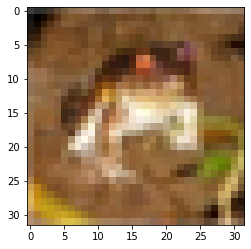

In [ ]:
plt.imshow(x_train[0])


In [ ]:
a = dataset.as_numpy_iterator()

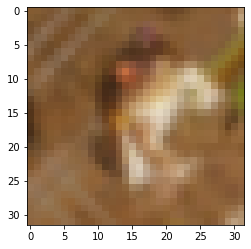

In [ ]:

plt.imshow(preprocessing_keras(np.array([x_train[0]]), training=True)[0])


In [ ]:
datagen1 = ImageDataGenerator(
    rotation_range=30)

datagen2 = ImageDataGenerator(
    width_shift_range=0.3)

datagen3 = ImageDataGenerator(
    shear_range= 40)

datagen4 = ImageDataGenerator( # vertical/horizontal flips
    horizontal_flip = True, vertical_flip = True)

datagen5 = ImageDataGenerator( # zooming in/out by 20%
    zoom_range= [0.7, 1.3])

datagen6 = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

labels = tf.one_hot(y_train, 10)
labels = tf.reshape(labels, (50000,10))


iterator1 = datagen1.flow(x = x_train/255,y = labels, batch_size = 64, shuffle=False)
iterator2 = datagen2.flow(x = x_train/255,y = labels, batch_size = 64, shuffle=False)
iterator3 = datagen3.flow(x = x_train/255,y = labels, batch_size = 64, shuffle=False)
iterator4 = datagen4.flow(x = x_train/255,y = labels, batch_size = 64, shuffle=False)
iterator5 = datagen5.flow(x = x_train/255,y = labels, batch_size = 64, shuffle=False)
iterator6 = datagen6.flow(x = x_train/255,y = labels, batch_size = 64, shuffle=False)

img = next(iterator1)[0][5]
plt.imshow(img, interpolation='nearest')
plt.show()

img = next(iterator2)[0][5]
plt.imshow(img, interpolation='nearest')
plt.show()

img = next(iterator3)[0][5]
plt.imshow(img, interpolation='nearest')
plt.show()

img = next(iterator4)[0][5]
plt.imshow(img, interpolation='nearest')
plt.show()

img = next(iterator5)[0][5]
plt.imshow(img, interpolation='nearest')
plt.show()

img = next(iterator6)[0][5]
plt.imshow(img, interpolation='nearest')
plt.show()

InvalidArgumentError: ignored

In [ ]:
len(iterator1)

782

In [ ]:
# Model for data augmentation techniques comparison

model = tf.keras.models.Sequential()
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[32, 32, 3]),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(224),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=keras.optimizers.Adam())
model.summary()





Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 32, 32, 3)         0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 32)                98336     
                                                                 
 dense_1 (Dense)             (None, 224)               7392      
                                                                 
 dense_2 (Dense)             (None, 64)                14400     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)               

In [ ]:
def gen1():
  for i in iterator1:
    yield i
def gen2():
  for i in iterator2:
    yield i
def gen3():
  for i in iterator3:
    yield
def gen4():
  for i in iterator4:
    yield i
def gen5():
  for i in iterator5:
    yield i
def gen6():
  for i in iterator6:
    yield   

In [ ]:
# dataset & test_db creation from generators
iter_1_db = tf.data.Dataset.from_generator(gen1, output_signature=(tf.TensorSpec(shape=(64, 32,32,3), dtype=tf.float32), tf.TensorSpec(shape=(64, 10), dtype=tf.int32)))
iter_2_db = tf.data.Dataset.from_generator(gen2, output_signature=(tf.TensorSpec(shape=(64, 32,32,3), dtype=tf.float32), tf.TensorSpec(shape=(64, 10), dtype=tf.int32)))
iter_3_db = tf.data.Dataset.from_generator(gen3, output_signature=(tf.TensorSpec(shape=(64, 32,32,3), dtype=tf.float32), tf.TensorSpec(shape=(64, 10), dtype=tf.int32)))
iter_4_db = tf.data.Dataset.from_generator(gen4, output_signature=(tf.TensorSpec(shape=(64, 32,32,3), dtype=tf.float32), tf.TensorSpec(shape=(64, 10), dtype=tf.int32)))
iter_5_db = tf.data.Dataset.from_generator(gen5, output_signature=(tf.TensorSpec(shape=(64, 32,32,3), dtype=tf.float32), tf.TensorSpec(shape=(64, 10), dtype=tf.int32)))
iter_6_db = tf.data.Dataset.from_generator(gen6, output_signature=(tf.TensorSpec(shape=(64, 32,32,3), dtype=tf.float32), tf.TensorSpec(shape=(64, 10), dtype=tf.int32)))



In [ ]:
# print(gen1().__next__())
model.fit(iter_1_db, epochs=3)
model.evaluate(test_db)


NameError: ignored

# EfficientNet

### Vanilla EfficientNetB0

In [ ]:
model = tf.keras.models.Sequential()
hub_url = 'gs://cloud-tpu-checkpoints/efficientnet/v2/hub/efficientnetv2-b0/feature-vector'
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[32, 32, 3]),
    layers.Resizing(224,224),
    hub.KerasLayer(hub_url, trainable=False, ),
    tf.keras.layers.Dense(256),
    layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                           mode='min',
                           verbose=1,
                           patience=3)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=keras.optimizers.Adam())
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_3 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 keras_layer_2 (KerasLayer)  (None, 1280)              5919312   
                                                                 
 dense_4 (Dense)             (None, 256)               327936    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 6,249,818
Trainable params: 330,506
Non-trainable params: 5,919,312
_________________________________________________________________


In [ ]:
history = model.fit(dataset, epochs=15,  callbacks = [early_stop], validation_data=test_db)

In [ ]:
history

In [ ]:
model.layers[0].trainable = True
model.optimizer.learning_rate = 1e-5

In [ ]:
model.fit(dataset, epochs=3)

In [ ]:
model.evaluate(test_db)

# ResNet50v2 arch

In [ ]:
model = tf.keras.Sequential([
    tf.keras.applications.ResNet50V2(include_top=False, input_shape=[32, 32, 3]),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                           mode='max',
                           verbose=1,
                           patience=3,)
lr_schedule = keras.optimizers.schedules.CosineDecayRestarts(0.01,1000)
optimizer= keras.optimizers.Adam(learning_rate=lr_schedule, clipvalue=0.1)

In [ ]:
history12 = model.fit(dataset, epochs=15 , validation_data=test_db)

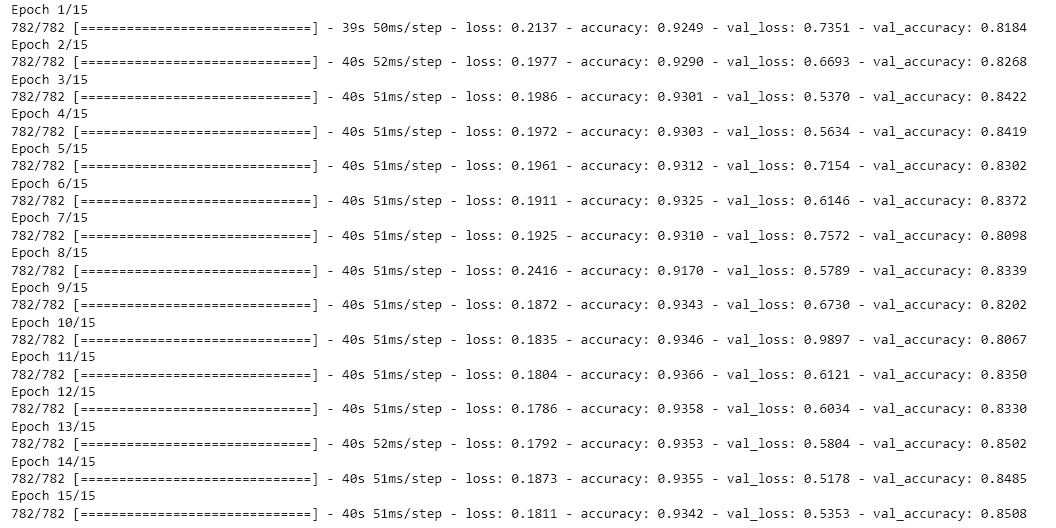

## Resnet50v2, pretrained


In [ ]:
hub_url = "https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/5"
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[32, 32, 3]),
    Resizing(224,224),
    hub.KerasLayer(hub_url, trainable=False),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=keras.optimizers.Adam())
model.summary()


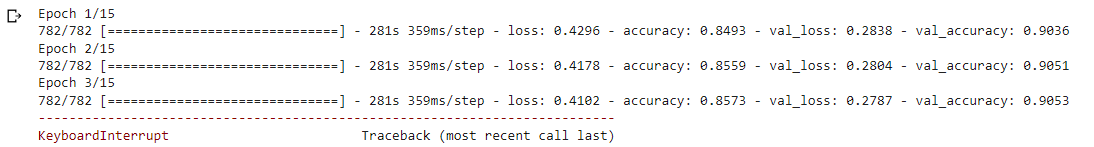

# EfficientNet, Augmented

In [ ]:

hub_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_b0/feature_vector/2"
model2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[32, 32, 3]),
    Resizing(224,224),
    hub.KerasLayer(hub_url, trainable=False),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=keras.optimizers.Adam())
model2.summary()

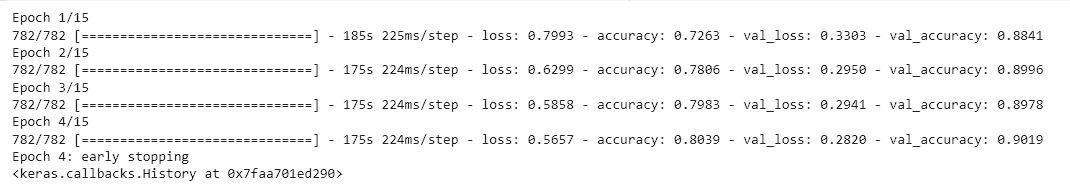

# Ensemble

In [ ]:
inputs = layers.Input(shape=[32, 32, 3]), 

outputs = layers.average([model(inputs), model2(inputs)])

ensemble_model = keras.Model(inputs = inputs, outputs = outputs)

In [ ]:
ensemble_model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=keras.optimizers.Adam())
ensemble_model.summary()

In [ ]:
ensemble_model.fit(dataset, epochs=3,  callbacks = [early_stop], validation_data=test_db)

In [ ]:
ensemble_model.evaluate(test_db)

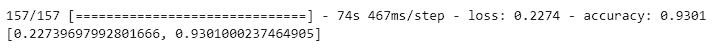

# CNN

In [ ]:
def get_model_2():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=[32,32,3]),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    #tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same"),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    #tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')])
  return model

In [ ]:
def get_model_3():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=[32,32,3]),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same"),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')])
  return model

In [ ]:
def get_model_4():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=[32,32,3]),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same"),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')])
  return model

In [ ]:
def get_model_X():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding="same", input_shape=[32,32,3],kernel_initializer = tf.keras.initializers.GlorotNormal()),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(32, (3, 3),kernel_initializer = tf.keras.initializers.GlorotNormal()),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    #tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same",kernel_initializer = tf.keras.initializers.GlorotNormal()),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(64, (3, 3),kernel_initializer = tf.keras.initializers.GlorotNormal()),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    #tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu',kernel_initializer = tf.keras.initializers.GlorotNormal()),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax',kernel_initializer = tf.keras.initializers.GlorotNormal())])
  return model

In [ ]:
#Example
model = get_model_3()
model.compile(loss = 'categorical_crossentropy',
             optimizer = keras.optimizers.Adam(learning_rate = 0.001),
             metrics = ['accuracy'])
hist_droput = model.fit(x = x_train, y = y_train,epochs = 50,validation_split = 0.2)

In [ ]:
#Results
from IPython.display import Image

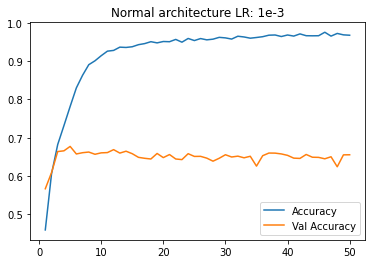

In [ ]:
Image("standard.png", width=400, height=300)

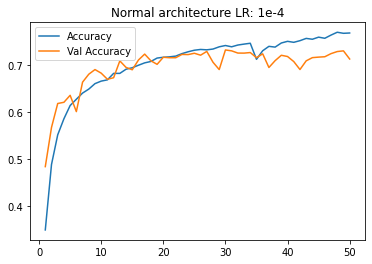

In [ ]:
Image("DO.png", width=400, height=300)

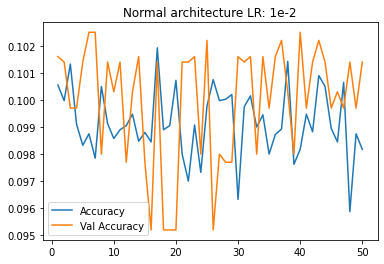

In [ ]:
Image("LR1e_2.png", width=400, height=300)

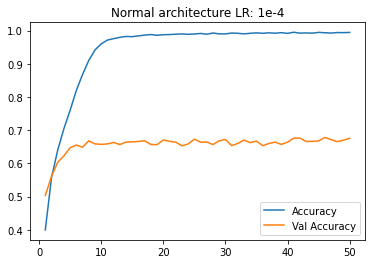

In [ ]:
Image("LR1e_4.png", width=400, height=300)

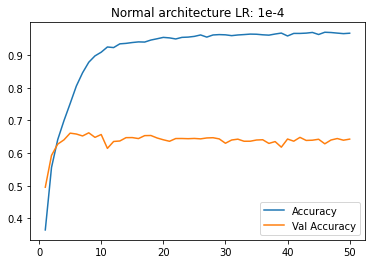

In [ ]:
Image("Xav.png", width=400, height=300)

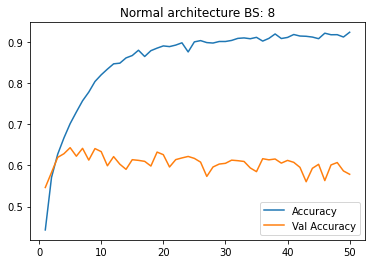

In [ ]:
Image("BS8.png", width=400, height=300)

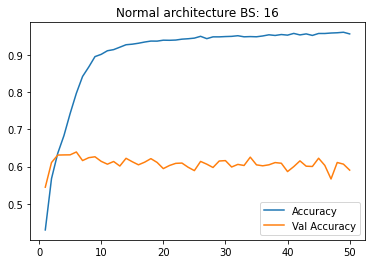

In [ ]:
Image("BS16.png", width=400, height=300)

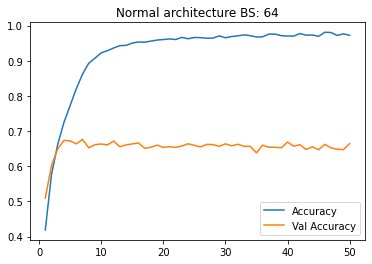

In [ ]:
Image("BS64.png", width=400, height=300)